<a href="https://colab.research.google.com/github/adityapatil4141/Deep-learning/blob/main/Transfer_learning_with_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:07<00:00, 97.5MB/s]
100% 1.06G/1.06G [00:07<00:00, 149MB/s] 


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [8]:
conv_base = VGG16(
    weights= 'imagenet',
    include_top = False,
    input_shape=(150,150,3)

)

58889256/58889256 [==============================] - 0s 0us/step


In [9]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [10]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
conv_base.trainable=False

In [13]:
#generators

train_df = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size = (150,150)
)

validation_df = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
# Normalize:
# getting image size in 0-255 to 0-1
def process(image,label):
  image = tensorflow.cast(image/255. ,tensorflow.float32)
  return image,label
train_df = train_df.map(process)
validation_df = validation_df.map(process)


In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_df,epochs=10,validation_data=validation_df)

Epoch 1/10
625/625 [==============================] - 69s 99ms/step - loss: 0.2700 - accuracy: 0.8863 - val_loss: 0.2052 - val_accuracy: 0.9132
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.1929 - accuracy: 0.9193 - val_loss: 0.2252 - val_accuracy: 0.9064
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1560 - accuracy: 0.9366 - val_loss: 0.2273 - val_accuracy: 0.9088
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1306 - accuracy: 0.9467 - val_loss: 0.2186 - val_accuracy: 0.9130
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1050 - accuracy: 0.9589 - val_loss: 0.2401 - val_accuracy: 0.9136
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.0806 - accuracy: 0.9688 - val_loss: 0.2821 - val_accuracy: 0.9076
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.0624 - accuracy: 0.9762 - val_loss: 0.3280 - val_accu

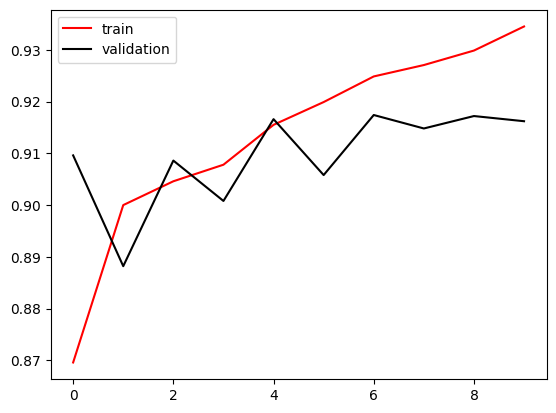

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='black',label='validation')
plt.legend()
plt.show()

In [ ]:
# Above model is giving accurcacy of and val_Accuracy of so this model is overfitting.
# To overcome overfitting we can use Data augmentation

# Using Data Augmentation

In [17]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)


In [20]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [21]:
conv_base.trainable = False

In [22]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img,img_to_array, load_img

In [26]:
# Used data augmentation flow rather than utils flow
batch_size=32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory='/content/train',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    directory='/content/test',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'

)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [27]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
history = model.fit_generator(train_generator,epochs=10,validation_data=validation_generator)

<ipython-input-28-c107fd39e75d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs=10,validation_data=validation_generator)


Epoch 1/10
625/625 [==============================] - 175s 277ms/step - loss: 0.2980 - accuracy: 0.8696 - val_loss: 0.2142 - val_accuracy: 0.9096
Epoch 2/10
625/625 [==============================] - 160s 256ms/step - loss: 0.2347 - accuracy: 0.9000 - val_loss: 0.2514 - val_accuracy: 0.8882
Epoch 3/10
625/625 [==============================] - 160s 256ms/step - loss: 0.2226 - accuracy: 0.9046 - val_loss: 0.2137 - val_accuracy: 0.9086
Epoch 4/10
625/625 [==============================] - 157s 252ms/step - loss: 0.2158 - accuracy: 0.9078 - val_loss: 0.2238 - val_accuracy: 0.9008
Epoch 5/10
625/625 [==============================] - 160s 256ms/step - loss: 0.1985 - accuracy: 0.9155 - val_loss: 0.2003 - val_accuracy: 0.9166
Epoch 6/10
625/625 [==============================] - 168s 269ms/step - loss: 0.1866 - accuracy: 0.9199 - val_loss: 0.2262 - val_accuracy: 0.9058
Epoch 7/10
625/625 [==============================] - 159s 254ms/step - loss: 0.1794 - accuracy: 0.9248 - val_loss: 0.1906 -

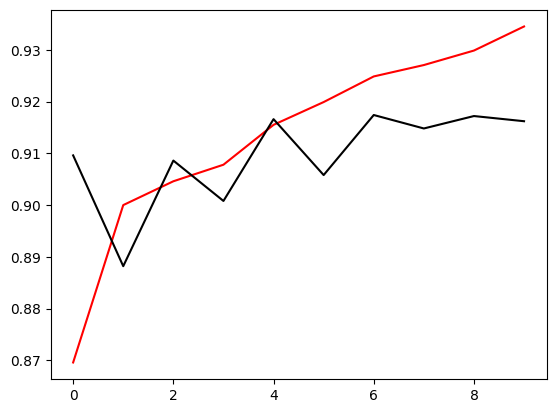

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='black',label='validation')